In [2]:
# importing main liblaries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")


In [3]:
# reading sample data file - World emistion of CO2, per country, per capita

co2 = pd.read_excel('World_Bank_CO2.xlsx',sheet_name="CO2 Data Cleaned", header=0)
co2.head(5)

,Country Code,Country Name,Region,Year,CO2 (kt),CO2 Per Capita (metric tons)
0,ABW,Aruba,Latin America & Caribbean,1960,NaN,NaN
1,ABW,Aruba,Latin America & Caribbean,1961,NaN,NaN
2,ABW,Aruba,Latin America & Caribbean,1962,NaN,NaN
3,ABW,Aruba,Latin America & Caribbean,1963,NaN,NaN
4,ABW,Aruba,Latin America & Caribbean,1964,NaN,NaN



# REL PLOT - Worlds most known chart



Text(-42.575,0.5,'CO2')

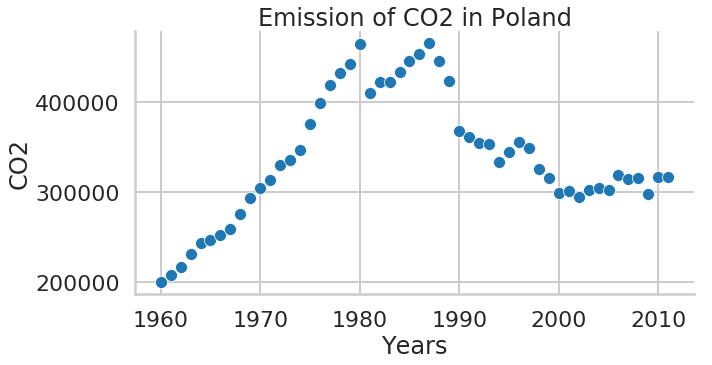

In [4]:
# REL PLOT - Worlds most known chart
# lets look on Poland

co2pol = co2[co2["Country Code"]=="POL"]

sns.relplot(data=co2pol,x="Year",y="CO2 (kt)",kind="scatter",aspect=2)
plt.title("Emission of CO2 in Poland")
plt.xlabel("Years")
plt.ylabel("CO2")

Text(80.8334,0.5,'CO2')

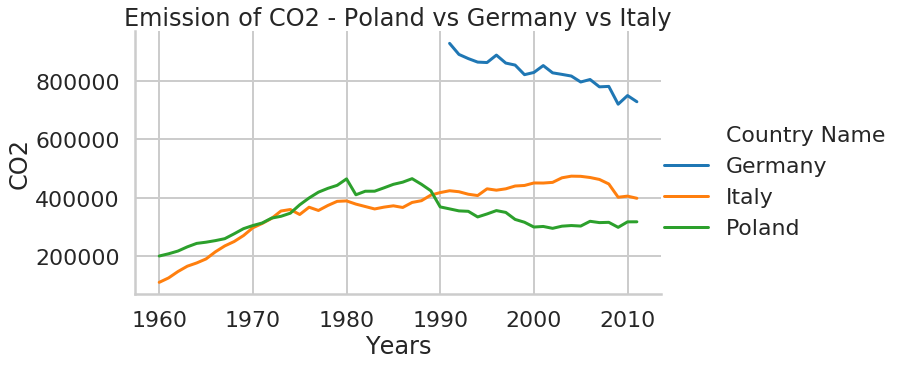

In [5]:
# REL PLOT - 2 Worlds most known charts
# lets compare Poland, Germany and Italy

co2eu = co2[co2["Country Code"].isin(["DEU","POL","ITA"])]

sns.relplot(data=co2eu,x="Year",y="CO2 (kt)",kind="line",aspect=2,hue="Country Name")

plt.title("Emission of CO2 - Poland vs Germany vs Italy")
plt.xlabel("Years")
plt.ylabel("CO2")



# catplot - plotting category data

/home/emil/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,34.8,'')

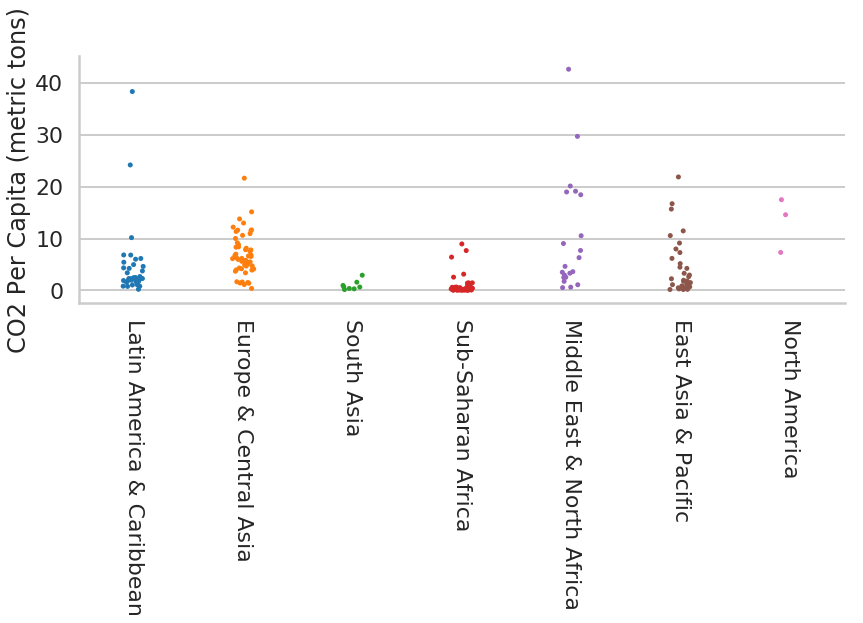

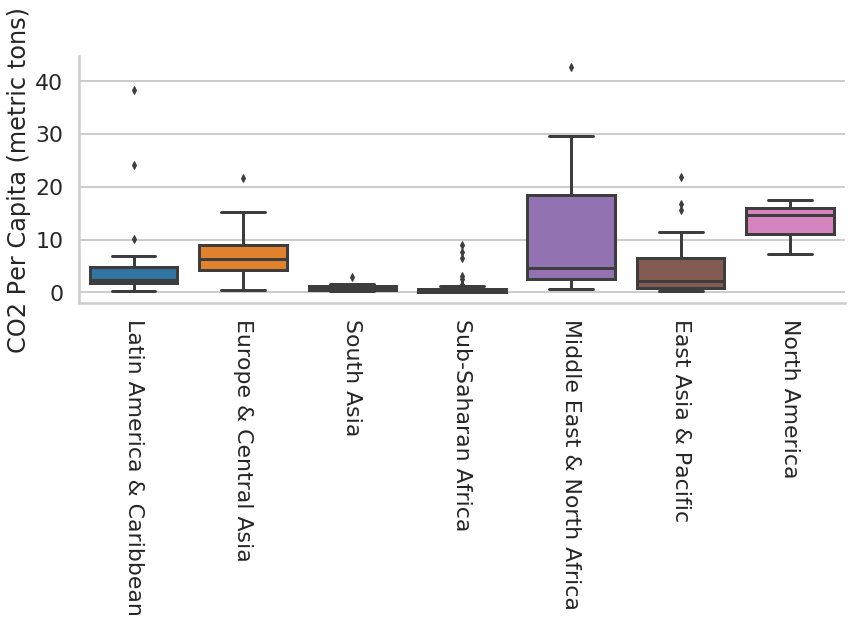

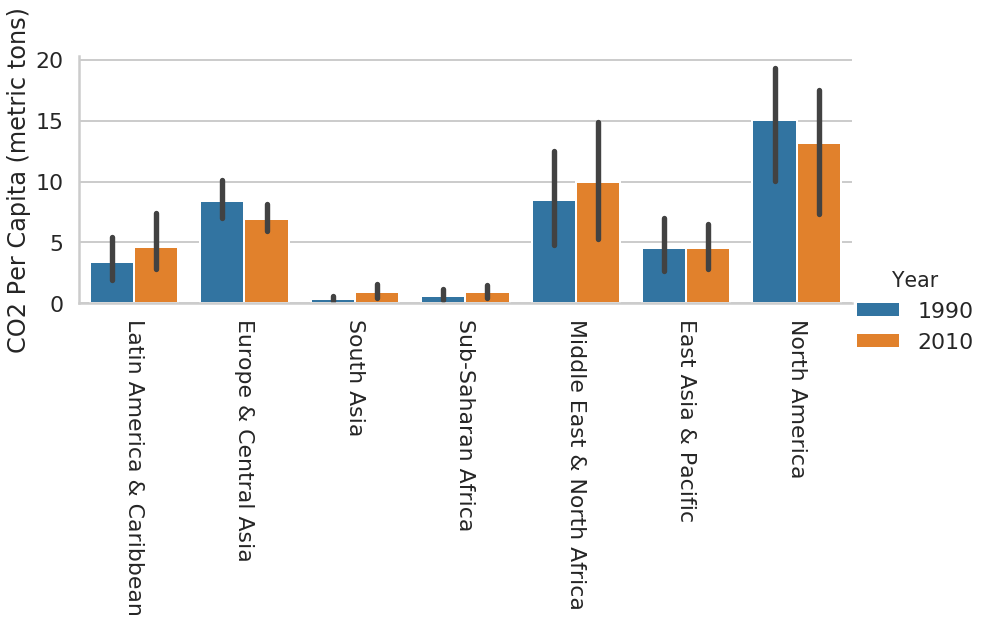

In [6]:
# plotting category data
# analyzing Co2 per region in more details

co2region = co2[co2.Year==2010].reindex()

sns.catplot(data=co2region, x="Region", y="CO2 Per Capita (metric tons)", aspect=2.5)
plt.xticks(rotation=-90)
plt.xlabel("")

sns.catplot(data=co2region, x="Region", y="CO2 Per Capita (metric tons)", aspect=2.5, kind="box")
plt.xticks(rotation=-90)
plt.xlabel("")

# lets try with HUE parameter
co2region2 = co2[co2.Year.isin([1990,2010])].reindex()

sns.catplot(data=co2region2, x="Region", y="CO2 Per Capita (metric tons)", aspect=2.5, hue="Year", kind="bar")
plt.xticks(rotation=-90)
plt.xlabel("")

# Distplot, Kdeplot & Joinplot - Data distribiutions

/home/emil/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


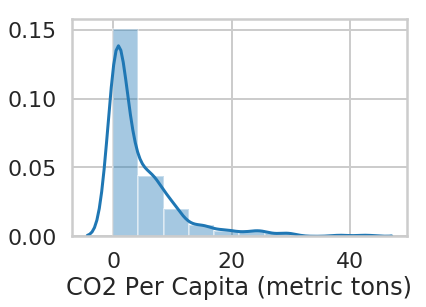

In [7]:
sns.distplot(co2region2["CO2 Per Capita (metric tons)"].dropna(),bins=10)


/home/emil/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


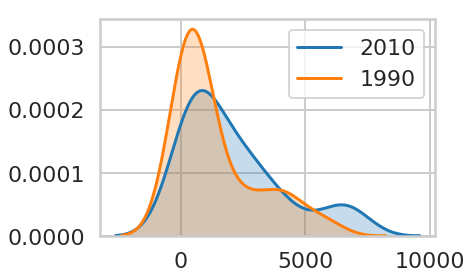

In [11]:

#removing outliners
co2region3 = co2region2[co2region2["CO2 Per Capita (metric tons)"] < 0.4].reindex()
co2region3 = co2region3[co2region3["CO2 (kt)"] < 7000].reindex()


sns.kdeplot(co2region3["CO2 (kt)"][co2region3.Year==2010], shade=True)
sns.kdeplot(co2region3["CO2 (kt)"][co2region3.Year==1990], shade=True)
plt.legend(['2010', '1990'])


/home/emil/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


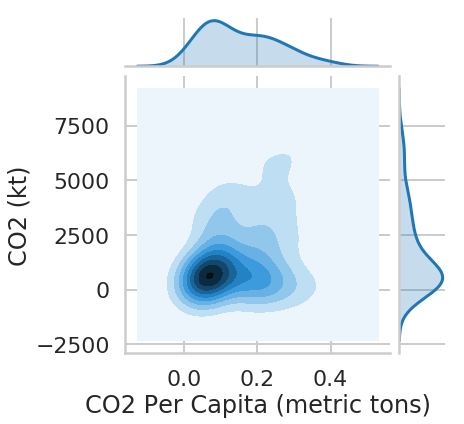

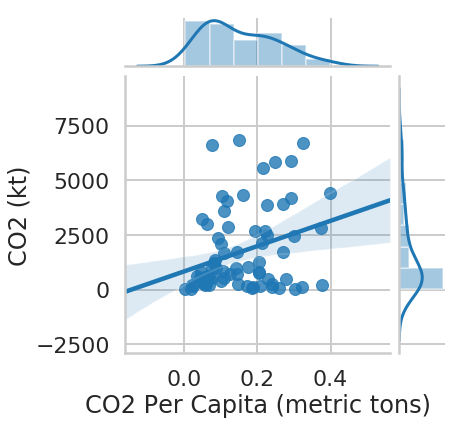

In [181]:
#visualizing corelation between CO2 and CO2 per capita

sns.jointplot(data=co2region3, x="CO2 Per Capita (metric tons)",y="CO2 (kt)", kind="kde")
sns.jointplot(data=co2region3, x="CO2 Per Capita (metric tons)",y="CO2 (kt)", kind="reg")

/home/emil/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


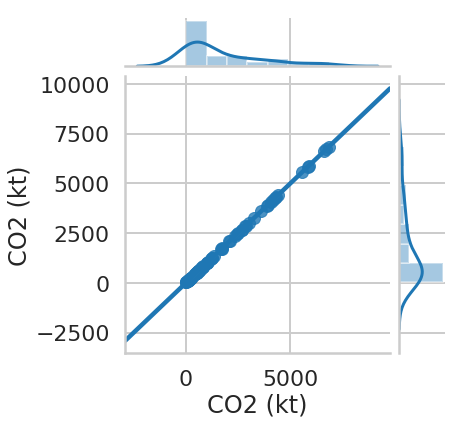

In [179]:
# if the correlation was 1 then this is how the chart would looks like 
sns.jointplot(data=co2region3, x="CO2 (kt)",y="CO2 (kt)", kind="reg")